<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week9/LSTM_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/TSLA.csv')
data = df['Close'].values.reshape(-1, 1)

In [4]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
# 3. 데이터셋 생성 함수 정의
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [6]:
# 3-1. 시퀀스 생성
window_6 = 6
window_12 = 12
X_6, y_6 = create_sequences(data, window_6)
X_12, y_12 = create_sequences(data, window_12)

In [8]:
# 4. train/test 데이터 분리
train_size_6 = int(len(X_6) * 0.8)
X_train_6, X_test_6 = X_6[:train_size_6], X_6[train_size_6:]
y_train_6, y_test_6 = y_6[:train_size_6], y_6[train_size_6:]

train_size_12 = int(len(X_12) * 0.8)
X_train_12, X_test_12 = X_12[:train_size_12], X_12[train_size_12:]
y_train_12, y_test_12 = y_12[:train_size_12], y_12[train_size_12:]

In [13]:
# 5. LSTM 모델 정의
tf.keras.backend.clear_session()
model_lstm_6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_6, 1)),
    tf.keras.layers.Dense(1)
])
model_lstm_6.compile(optimizer='adam', loss='mse')

model_lstm_12 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_12, 1)),
    tf.keras.layers.Dense(1)
])
model_lstm_12.compile(optimizer='adam', loss='mse')

In [14]:
# 6-1. 모델(윈도우 사이즈 6) 훈련 및 History 저장
EPOCHS = 50
BATCH_SIZE = 8

print("--- LSTM(window=6) 훈련 시작 ---")
history_lstm_6 = model_lstm_6.fit(
    X_train_6, y_train_6,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_6, y_test_6),
    verbose=1
)
print("--- LSTM(window=6) 훈련 완료 ---")

--- LSTM(window=6) 훈련 시작 ---
Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.3037e-04 - val_loss: 0.0012
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8371e-06 - val_loss: 0.0013
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6116e-06 - val_loss: 0.0011
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.2425e-06 - val_loss: 0.0014
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.9997e-06 - val_loss: 0.0012
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.0957e-06 - val_loss: 0.0018
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8220e-06 - val_loss: 0.0012
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7758e-06 - val_loss: 9.6360e-04
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0498e-06 - val_loss: 8.4121e-04
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9290e-06 - val_loss: 9.1224e-04
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - los

In [15]:
# 6-2. 모델(윈도우 사이즈 12) 훈련 및 History 저장
print("--- LSTM(window=12) 훈련 시작 ---")
history_lstm_12 = model_lstm_12.fit(
    X_train_12, y_train_12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_12, y_test_12),
    verbose=1
)
print("--- LSTM(window=12) 훈련 완료 ---")

--- LSTM(window=12) 훈련 시작 ---
Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1580e-04 - val_loss: 0.0026
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.4828e-06 - val_loss: 0.0023
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.8026e-06 - val_loss: 0.0016
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.1695e-06 - val_loss: 0.0015
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.0034e-06 - val_loss: 0.0011
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.9564e-06 - val_loss: 0.0014
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.8089e-06 - val_loss: 0.0010
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.8725e-06 - val_loss: 8.2505e-04
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2721e-06 - val_loss: 7.0834e-04
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6901e-06 - val_loss: 7.2350e-04
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - 

In [16]:
# 7. RNN(SimpleRNN) 모델 추가
tf.keras.backend.clear_session()
model_rnn_6 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window_6, 1)),
    tf.keras.layers.Dense(1)
])
model_rnn_6.compile(optimizer='adam', loss='mse')

model_rnn_12 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window_12, 1)),
    tf.keras.layers.Dense(1)
])
model_rnn_12.compile(optimizer='adam', loss='mse')

In [17]:
# 8-1. RNN 모델(윈도우 사이즈 6) 훈련
print("--- RNN(window=6) 훈련 시작 ---")
history_rnn_6 = model_rnn_6.fit(
    X_train_6, y_train_6,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_6, y_test_6),
    verbose=1
)
print("--- RNN(window=6) 훈련 완료 ---")

--- RNN(window=6) 훈련 시작 ---
Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.0519e-05 - val_loss: 0.0056
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8528e-06 - val_loss: 0.0026
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4066e-06 - val_loss: 0.0011
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8965e-06 - val_loss: 8.0265e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1578e-06 - val_loss: 0.0011
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9332e-06 - val_loss: 0.0017
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9574e-06 - val_loss: 9.6845e-04
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7692e-06 - val_loss: 5.9589e-04
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7052e-06 - val_loss: 5.0791e-04
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.4972e-06 - val_loss: 6.9561e-04
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/st

In [18]:
# 8-2. RNN 모델(윈도우 사이즈 12) 훈련
print("--- RNN(window=12) 훈련 시작 ---")
history_rnn_12 = model_rnn_12.fit(
    X_train_12, y_train_12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_12, y_test_12),
    verbose=1
)
print("--- RNN(window=12) 훈련 완료 ---")

--- RNN(window=12) 훈련 시작 ---
Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.5854e-04 - val_loss: 0.0078
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9535e-06 - val_loss: 0.0044
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7256e-06 - val_loss: 0.0027
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6397e-06 - val_loss: 0.0019
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4099e-06 - val_loss: 0.0014
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4782e-06 - val_loss: 0.0019
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2579e-06 - val_loss: 0.0017
Epoch 8/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8405e-06 - val_loss: 0.0014
Epoch 9/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1647e-06 - val_loss: 9.5327e-04
Epoch 10/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.1505e-06 - val_loss: 8.5784e-04
Epoch 11/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2

In [19]:
# 9. 예측 및 MSE 계산
pred_rnn_6 = model_rnn_6.predict(X_test_6)
pred_rnn_12 = model_rnn_12.predict(X_test_12)

mse_rnn_6 = mean_squared_error(y_test_6, pred_rnn_6)
mse_rnn_12 = mean_squared_error(y_test_12, pred_rnn_12)

print(f"RNN(window=6) MSE: {mse_rnn_6:.6f}")
print(f"RNN(window=12) MSE: {mse_rnn_12:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RNN(window=6) MSE: 0.000768
RNN(window=12) MSE: 0.000774


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


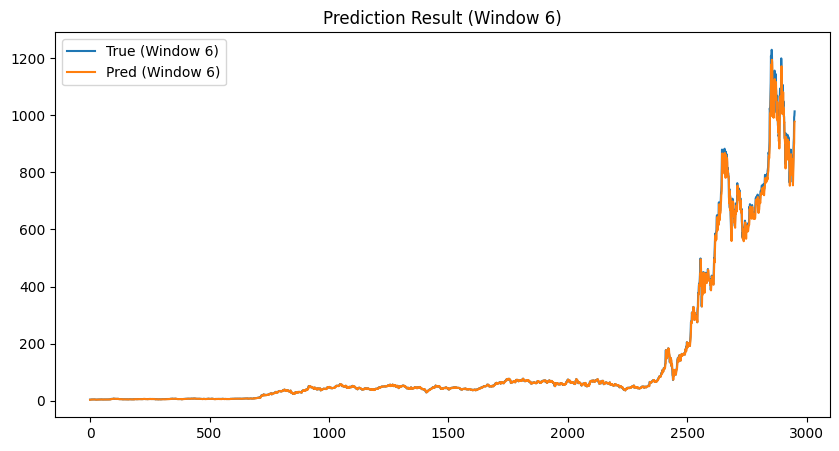

In [22]:
# 10. 예측 시각화 (선택 사항: 모델 성능 확인)
# 10-1. 예측 (윈도우 사이즈 6) - 전체 데이터셋을 사용
pred_6 = model_lstm_6.predict(X_6)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_6), label='True (Window 6)')
plt.plot(scaler.inverse_transform(pred_6), label='Pred (Window 6)')
plt.title('Prediction Result (Window 6)')
plt.legend()
plt.show()

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


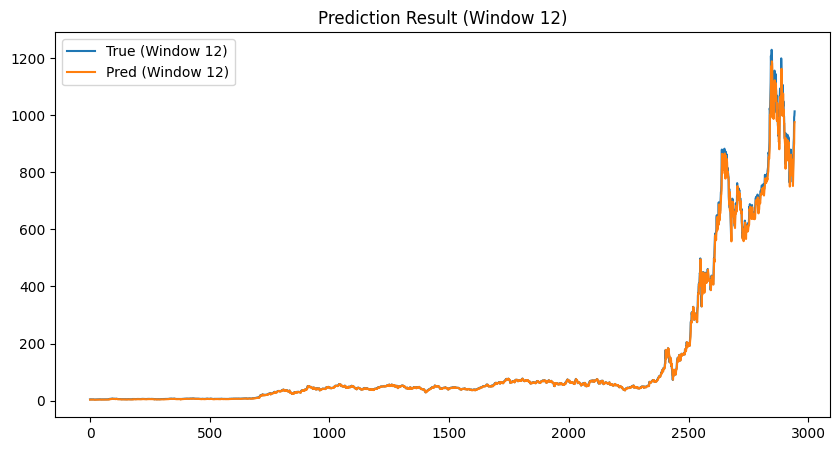

In [23]:
# 10-2. 예측 (윈도우 사이즈 12) - 전체 데이터셋을 사용
pred_12 = model_lstm_12.predict(X_12)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_12), label='True (Window 12)')
plt.plot(scaler.inverse_transform(pred_12), label='Pred (Window 12)')
plt.title('Prediction Result (Window 12)')
plt.legend()
plt.show()

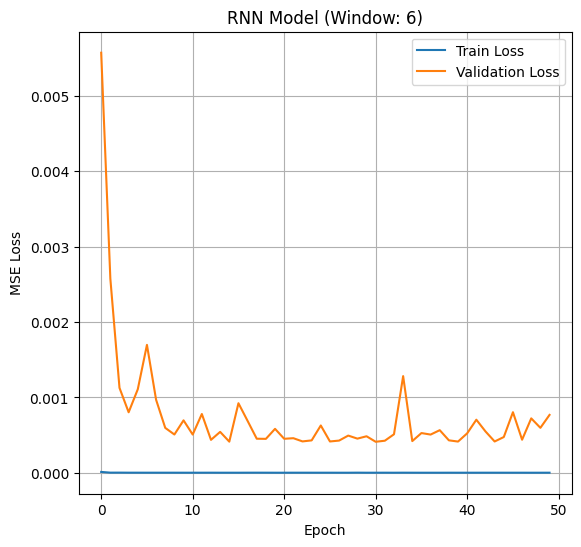

In [24]:
# 11. MSE 그래프 시각화 (Loss Curve)
# 11-1. model_lstm_6 MSE 그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_6.history['loss'], label='Train Loss')
plt.plot(history_rnn_6.history['val_loss'], label='Validation Loss')
plt.title(f'RNN Model (Window: 6)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

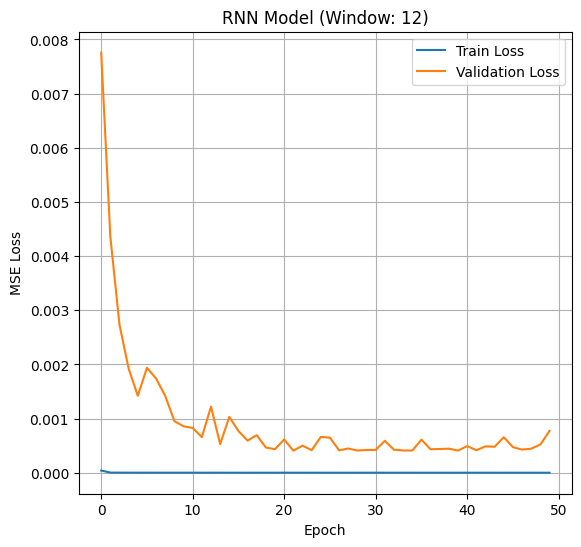

In [25]:
# 11-2. model_lstm_12 MSE 그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(history_rnn_12.history['loss'], label='Train Loss')
plt.plot(history_rnn_12.history['val_loss'], label='Validation Loss')
plt.title(f'RNN Model (Window: 12)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()